In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# inital

In [25]:
a = 2
b = 3
x0 = (a, 1)
epsilon = 1e-15

In [26]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 0.5*(x1**2 + (a * x2**2)) - np.cos(b * (x1 + x2))

In [27]:
def f_gradient(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([(x1 + np.sin(b*(x1+x2))*b),
                     (a*x2 + np.sin(b*(x1+x2))*b)])

# steepest-descent method

In [28]:
def steepest_descent(x, max_iterations, t):
    x_hist = []
    x_hist.append(x)
    results = []
    results.append(f(x))
    k = 1
    while True:
        x = x + (t * -f_gradient(x))
        x_hist.append(x)
        results.append(f(x))
        if k == max_iterations or abs(results[-1] - results[-2]) <= epsilon:
            break
        else:
            k += 1
    return x_hist, results

In [29]:
def plot_contour(x):
    x1_plot = [float(x[0]) for x in x]
    x2_plot = [float(x[1]) for x in x]

    xlist = np.linspace(-2.5, 10.0, 100)
    ylist = np.linspace(-3.5, 3.5, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = ((1/2)*((X**2) + (2*(Y**2))))-(np.cos(3*(X+Y)))
    fig, ax = plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.plot(x1_plot, x2_plot)
    plt.show()

In [30]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def plot_result2(x):
    x1_plot = [float(x[0]) for x in x]
    x2_plot = [float(x[1]) for x in x]

    X = np.arange(-3, 3, 0.25)
    Y = np.arange(-3, 3, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = ((1/2)*((X**2) + (2*(Y**2))))-(np.cos(3*(X+Y)))
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlim(-1.01, 20)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')

    fig.colorbar(surf, shrink=0.5, aspect=5)
    z1_plot = np.array([((1/2)*((np.array(x1_plot)**2) + (2*(np.array(x2_plot)**2))))-(np.cos(3*(np.array(x1_plot)+np.array(x2_plot))))])
    z1_plot = z1_plot.T
    ax.scatter(x1_plot[:-1],x2_plot[:-1],z1_plot[:-1],c='green',marker='x')
    ax.scatter(x1_plot[-1:],x2_plot[-1:],z1_plot[-1:],c='black',marker='*')
    plt.show()

In [31]:
def plot_objectivevalue(x, num_iter):
    x1_plot = [float(x[0]) for x in x]
    x2_plot = [float(x[1]) for x in x]

    fig, ax = plt.subplots(1,1)
    y_plot = np.array([((1/2)*((np.array(x1_plot)**2) + (2*(np.array(x2_plot)**2))))-(np.cos(3*(np.array(x1_plot)+np.array(x2_plot))))]).T
    x_plot = np.array([int(y) for y in range(num_iter)]).T
    ax.plot(x_plot, y_plot, '-', c='r', marker='x')
    ax.set_xlabel('iteration')
    ax.set_ylabel('objective value')
    plt.show()

# find x*, p* by steepest-descent method

p* = 0.3597727553131582
x_k [(2, 1), array([1.83818223, 0.83818223]), array([1.59856705, 0.60665794]), array([1.4696791 , 0.49703254]), array([1.45225787, 0.50339202])]
k iterations: 195


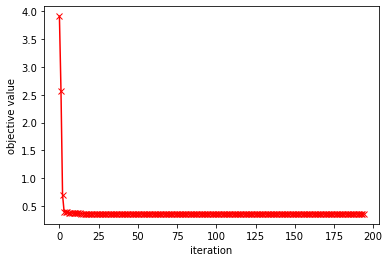

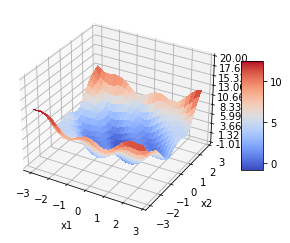

In [32]:
t = 0.05
max_iterations = 500
x_hist,f_SD_t1 = steepest_descent(x0,max_iterations,t)
p_opt = min(f_SD_t1)
print('p* =',p_opt)
print('x_k',x_hist[:5])
iteration_value=len(x_hist)
print('k iterations:', len(x_hist))
# create csv file
df = pd.DataFrame(x_hist)
df.to_csv('problem3_t1.csv', index=False, header=False)
plot_contour(x_hist)
plot_objectivevalue(x_hist, iteration_value)
plot_result2(x_hist)

p* = 0.40450482071171656
x_k [(2, 1), array([1.51454668, 0.51454668]), array([1.37495921, 0.44777721]), array([1.49618446, 0.64091317]), array([1.21426593, 0.39114837])]
k iterations: 501


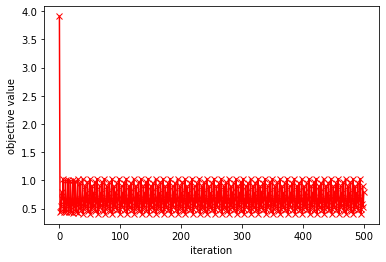

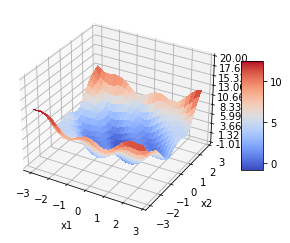

In [33]:
t = 0.15
max_iterations = 500
x_hist,f_SD_t1 = steepest_descent(x0,max_iterations,t)
p_opt = min(f_SD_t1)
print('p* =',p_opt)
print('x_k',x_hist[:5])
iteration_value=len(x_hist)
print('k iterations:', len(x_hist))
# create csv file
df = pd.DataFrame(x_hist)
df.to_csv('problem3_t2.csv', index=False, header=False)
plot_objectivevalue(x_hist, iteration_value)
plot_result2(x_hist)